In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kyphosis.csv to kyphosis.csv


In [4]:
df= pd.read_csv('kyphosis.csv')
df[:5]

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


* Here Kyphosis column, is the target column we will be working with, it says whether the kyphosis is present or absent after opeation.
* Here age column is the age in months
* Number feature is the number of verterbraes involved in operation of Kyphosis disease.
* start feature is the 1st verterbrae that was opearted on

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.shape

(81, 4)

In [7]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [13]:
df.drop(columns= 'age_yrs', inplace= True)

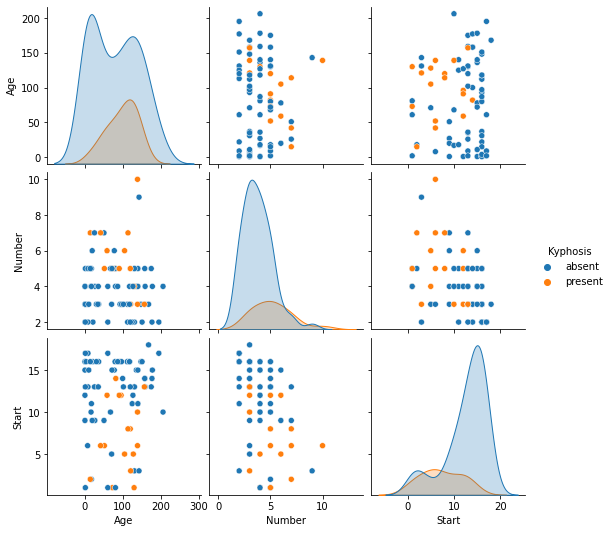

In [14]:
sns.pairplot(data= df, hue= 'Kyphosis')

In [15]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [16]:
# Feature matix
X= df[['Age', 'Number', 'Start']]
X[:5]

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [17]:
# Target array
y= df['Kyphosis']
y[:5]

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

Here we see that our target array is either Present or absent, hence it's a binary classifier

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)

In [20]:
# Let's import our Decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [21]:
# Let's train the model 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
# Now, let's predict
pred_dtree = dtree.predict(X_test)

In [23]:
pred_dtree[:5]

array(['absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [24]:
y_test[:5]

30     absent
0      absent
22    present
31     absent
18     absent
Name: Kyphosis, dtype: object

In [26]:
# Model Evaluation Process
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_dtree))
print("\n")
print(classification_report(y_test, pred_dtree))

[[16  3]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.76      0.84      0.80        19
     present       0.25      0.17      0.20         6

    accuracy                           0.68        25
   macro avg       0.51      0.50      0.50        25
weighted avg       0.64      0.68      0.66        25



* there are 19 observed category of absent, out of which 16 have been predicted correctly and 3 have been False positive which gives an F Score of 0.80
* Whereas in present category there are total of 6, out of which 5 have been predicted wrong and just 1 predicted correctly, which gives a F score of just 0.20
* So the final accuracy of F1 score is 0.68 or 68%
* Since the model has limited observations it's underfitting because of lack of data

In [27]:
# we shall try Random Forest and see whether the acuuracy can be increased or not
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=100)

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
pred_rfc = rfc.predict(X_test)

In [31]:
pred_rfc[:5]

array(['absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [32]:
y[:5]

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [33]:
# Model Evaluation process
print(confusion_matrix(y_test, pred_rfc))
print("\n")
print(classification_report(y_test, pred_rfc))

[[19  0]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



* There are 19 observed category of absent, out of which all 19 have been predicted correctly, giving 0 False positive values, giving a F1 score of 0.88.
* There are just 6 observed values of category present, among which 5 have been predicted falsly and just 1 has been predicted correctly giving an F1 score of 0.29
* So, the overall accuracy of the model has been on 80% when using Random Forest classifier.
* Hence, always Random Forests performs better than decision trees on most of the occassions because Random forest is an ensemble of many decision trees.